In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data.sampler import SubsetRandomSampler
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import datasets, transforms, models
from torch.autograd import Variable
from zipfile import ZipFile
import os
from os import path
import shutil

In [2]:
url = 'Dataset/'

In [3]:
# dataset_A = url + 'Dataset C.zip'
# with ZipFile(dataset_A, 'r') as zip:
#   zip.extractall()

In [4]:
PATH = 'Dataset/'
data_labels = pd.read_csv(PATH + 'verification_test.csv')
print(data_labels.shape)
data_labels.head()

(10000, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# TRAIN_PATH = url + 'Train'
# os.mkdir(TRAIN_PATH)

# def processImages(folder_name):
#   src = PATH + folder_name + '/'
#   dir_folders = os.listdir(src)
#   for dir_name in dir_folders:
#     file_name = os.path.join(src, dir_name)
#     if os.path.isfile(file_name):
#       shutil.copy(file_name, TRAIN_PATH) 

# processImages('training-a')

In [5]:
TRAIN_PATH = url + 'training-c'


In [6]:
train_dataset = pd.read_csv(PATH + 'verification_train.csv')
test_dataset = pd.read_csv(PATH + 'verification_test.csv')

In [ ]:
from PIL import Image    



In [106]:
class Dataset(Dataset):
    def __init__(self, df, transform=None):
        self.data = df
        self.transform = transform
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        item = self.data.iloc[index]
        
#         path = self.root + "/" + item[0]
        im_array = np.int8(np.reshape(item[1:].to_numpy(), (28, 28))) # create a 2D array from flat array
        image = Image.fromarray(im_array, 'L')
#         image =(item[1:].to_numpy())
        label = item[0]
        
#         print(item.shape)
        
        if self.transform is not None:
            image = self.transform(image)
            
        return image, label

In [107]:
mean = [0.5,]
std = [0.5, ]

train_transform = transforms.Compose([
    transforms.Resize(28),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

test_transform = transforms.Compose([
        transforms.Resize(28),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
])

train_data  = Dataset(train_dataset, train_transform)
test_data = Dataset(test_dataset, test_transform)

print("Trainig Samples: ", len(train_data))

Trainig Samples:  60000


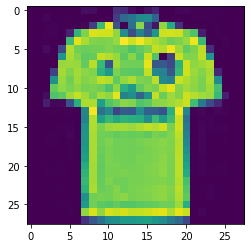

In [108]:
plt.imshow(test_data[0][0].reshape(28,28,1))

# **Base Parameters**

In [109]:
batch_size = 250
num_iters = 25000
input_dim = 28*28
num_hidden = 320
output_dim = 10

learning_rate = 0.028

num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

104


In [110]:
test_size = 0.2
num_train = len(train_data)
indices = list(range(num_train))
# np.random.shuffle(indices)
split = int(np.floor(test_size * num_train))
train_idx, test_idx = indices[split:], indices[:split]

train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size,
    sampler=train_sampler)

test_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size,
    sampler=test_sampler)


print("Train dataloader:{}".format(len(train_loader)))
print("Test dataloader:{}".format(len(test_loader)))

Train dataloader:192
Test dataloader:48


In [111]:
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
       
        self.linear_1 = nn.Linear(input_size, num_hidden)
        self.relu_1 = nn.ReLU()
#         self.softmax_1 = nn.Softmax(dim=1)
 
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        self.relu_2 = nn.Softmax(dim=0)
#         self.softmax_2 = nn.Softmax(dim=1)
 
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        self.relu_3 = nn.ReLU()
#         self.softmax_3 = nn.Softmax(dim=1)
 
#         self.linear_4 = nn.Linear(num_hidden, num_hidden)
#         self.relu_4 = nn.ReLU()
#         self.softmax_4 = nn.Softmax(dim=1)
 
#         self.linear_5= nn.Linear(num_hidden, num_hidden)
#         self.relu_5= nn.ReLU()
#         self.softmax_5 = nn.Softmax(dim=1)
 
#         self.linear_6 = nn.Linear(num_hidden, num_hidden)
#         self.relu_6 = nn.ReLU()
        
#         self.linear_7 = nn.Linear(num_hidden, num_hidden)
#         self.relu_7 = nn.ReLU()
        
#         self.linear_8 = nn.Linear(num_hidden, num_hidden)
#         self.relu_8 = nn.ReLU()
        
#         self.linear_9 = nn.Linear(num_hidden, num_hidden)
#         self.relu_9 = nn.ReLU()

#         self.linear_10 = nn.Linear(num_hidden, num_hidden)
#         self.relu_10 = nn.ReLU()

        self.linear_out = nn.Linear(num_hidden, num_classes)
 
    def forward(self, x):
        out  = self.linear_1(x)
        out = self.relu_1(out)
        
        out  = self.linear_2(out)
        out = self.relu_2(out)
 
        out  = self.linear_3(out)
        out = self.relu_3(out)
 
#         out  = self.linear_4(out)
#         out = self.relu_4(out)
 
#         out  = self.linear_5(out)
#         out = self.relu_5(out)
 
#         out  = self.linear_6(out)
#         out = self.relu_6(out)
        
#         out  = self.linear_7(out)
#         out = self.relu_7(out)
        
#         out  = self.linear_8(out)
#         out = self.relu_8(out)
        
#         out  = self.linear_9(out)
#         out = self.relu_9(out)
        
#         out  = self.linear_10(out)
#         out = self.relu_10(out)
        
        probas  = self.linear_out(out)
        return probas

In [112]:
model = DeepNeuralNetworkModel(input_size = input_dim, num_classes = output_dim, num_hidden = num_hidden)

model.to(device)

DeepNeuralNetworkModel(
  (linear_1): Linear(in_features=784, out_features=320, bias=True)
  (relu_1): ReLU()
  (linear_2): Linear(in_features=320, out_features=320, bias=True)
  (relu_2): Softmax(dim=0)
  (linear_3): Linear(in_features=320, out_features=320, bias=True)
  (relu_3): ReLU()
  (linear_out): Linear(in_features=320, out_features=10, bias=True)
)

In [113]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adagrad(model.parameters(), lr = learning_rate)

In [114]:
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    print('Epoch: ', epoch + 1)
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(images) 

        loss = criterion(outputs, labels)

        loss.backward()

        optimizer.step()

        iter += 1

        if iter % 10 == 0:        
            correct = 0
            total = 0
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                outputs = model(images)

                _, predicted = torch.max(outputs, 1)

                total += labels.size(0)

                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Epoch:  1
Iteration: 10. Loss: 1.86600661277771. Accuracy: 39.40833333333333
Iteration: 20. Loss: 1.2388912439346313. Accuracy: 57.166666666666664
Iteration: 30. Loss: 0.9460996389389038. Accuracy: 62.31666666666667
Iteration: 40. Loss: 0.8961799144744873. Accuracy: 69.79166666666667
Iteration: 50. Loss: 0.7501104474067688. Accuracy: 73.29166666666667
Iteration: 60. Loss: 0.79716557264328. Accuracy: 73.91666666666667
Iteration: 70. Loss: 0.7312058806419373. Accuracy: 77.39166666666667
Iteration: 80. Loss: 0.6504395008087158. Accuracy: 78.975
Iteration: 90. Loss: 0.525875985622406. Accuracy: 79.76666666666667
Iteration: 100. Loss: 0.5764052271842957. Accuracy: 80.625
Iteration: 110. Loss: 0.6310359835624695. Accuracy: 80.55833333333334
Iteration: 120. Loss: 0.5497689843177795. Accuracy: 82.18333333333334
Iteration: 130. Loss: 0.4897805154323578. Accuracy: 80.91666666666667
Iteration: 140. Loss: 0.6389911770820618. Accuracy: 82.36666666666666
Iteration: 150. Loss: 0.5279656052589417. Acc

Iteration: 1230. Loss: 0.297511488199234. Accuracy: 88.18333333333334
Iteration: 1240. Loss: 0.1768825352191925. Accuracy: 88.21666666666667
Iteration: 1250. Loss: 0.2327302098274231. Accuracy: 88.425
Iteration: 1260. Loss: 0.26172468066215515. Accuracy: 88.3
Iteration: 1270. Loss: 0.21702508628368378. Accuracy: 88.6
Iteration: 1280. Loss: 0.3228091895580292. Accuracy: 88.45
Iteration: 1290. Loss: 0.233378604054451. Accuracy: 88.43333333333334
Iteration: 1300. Loss: 0.16701024770736694. Accuracy: 88.23333333333333
Iteration: 1310. Loss: 0.2482432872056961. Accuracy: 88.55833333333334
Iteration: 1320. Loss: 0.21605314314365387. Accuracy: 88.55
Iteration: 1330. Loss: 0.2543960213661194. Accuracy: 88.125
Iteration: 1340. Loss: 0.2133764624595642. Accuracy: 88.26666666666667
Epoch:  8
Iteration: 1350. Loss: 0.24375824630260468. Accuracy: 88.19166666666666
Iteration: 1360. Loss: 0.2695317268371582. Accuracy: 88.39166666666667
Iteration: 1370. Loss: 0.24452881515026093. Accuracy: 88.64166666

Iteration: 2440. Loss: 0.15709839761257172. Accuracy: 88.84166666666667
Iteration: 2450. Loss: 0.22459353506565094. Accuracy: 88.525
Iteration: 2460. Loss: 0.17160724103450775. Accuracy: 88.99166666666666
Iteration: 2470. Loss: 0.2008085548877716. Accuracy: 88.40833333333333
Iteration: 2480. Loss: 0.15086480975151062. Accuracy: 88.65
Iteration: 2490. Loss: 0.11249804496765137. Accuracy: 88.71666666666667
Epoch:  14
Iteration: 2500. Loss: 0.1202363520860672. Accuracy: 88.80833333333334
Iteration: 2510. Loss: 0.16365155577659607. Accuracy: 88.775
Iteration: 2520. Loss: 0.15385007858276367. Accuracy: 88.65
Iteration: 2530. Loss: 0.17669573426246643. Accuracy: 88.63333333333334
Iteration: 2540. Loss: 0.10746633261442184. Accuracy: 88.85
Iteration: 2550. Loss: 0.10082662105560303. Accuracy: 88.98333333333333
Iteration: 2560. Loss: 0.17190249264240265. Accuracy: 88.99166666666666
Iteration: 2570. Loss: 0.1335764080286026. Accuracy: 89.16666666666667
Iteration: 2580. Loss: 0.12389311194419861

Iteration: 3640. Loss: 0.07879479974508286. Accuracy: 88.96666666666667
Epoch:  20
Iteration: 3650. Loss: 0.1354687511920929. Accuracy: 88.61666666666666
Iteration: 3660. Loss: 0.14626160264015198. Accuracy: 88.725
Iteration: 3670. Loss: 0.14534403383731842. Accuracy: 88.55
Iteration: 3680. Loss: 0.13243956863880157. Accuracy: 88.725
Iteration: 3690. Loss: 0.11708331853151321. Accuracy: 88.575
Iteration: 3700. Loss: 0.0989220142364502. Accuracy: 88.725
Iteration: 3710. Loss: 0.12511447072029114. Accuracy: 88.425
Iteration: 3720. Loss: 0.15258415043354034. Accuracy: 88.9
Iteration: 3730. Loss: 0.1711854785680771. Accuracy: 88.725
Iteration: 3740. Loss: 0.18817637860774994. Accuracy: 88.35
Iteration: 3750. Loss: 0.11052856594324112. Accuracy: 88.8
Iteration: 3760. Loss: 0.09346866607666016. Accuracy: 88.98333333333333
Iteration: 3770. Loss: 0.13068392872810364. Accuracy: 88.89166666666667
Iteration: 3780. Loss: 0.11250325292348862. Accuracy: 88.63333333333334
Iteration: 3790. Loss: 0.113

Iteration: 4860. Loss: 0.08150917291641235. Accuracy: 88.86666666666666
Iteration: 4870. Loss: 0.094203419983387. Accuracy: 88.30833333333334
Iteration: 4880. Loss: 0.0971861407160759. Accuracy: 88.69166666666666
Iteration: 4890. Loss: 0.10284390300512314. Accuracy: 88.78333333333333
Iteration: 4900. Loss: 0.11151590943336487. Accuracy: 88.63333333333334
Iteration: 4910. Loss: 0.09526610374450684. Accuracy: 88.725
Iteration: 4920. Loss: 0.11992927640676498. Accuracy: 88.70833333333333
Iteration: 4930. Loss: 0.1315750926733017. Accuracy: 88.35
Iteration: 4940. Loss: 0.10200861841440201. Accuracy: 88.625
Iteration: 4950. Loss: 0.11162946373224258. Accuracy: 88.70833333333333
Iteration: 4960. Loss: 0.07966366410255432. Accuracy: 88.41666666666667
Iteration: 4970. Loss: 0.06997615844011307. Accuracy: 88.575
Iteration: 4980. Loss: 0.05850110948085785. Accuracy: 88.425
Iteration: 4990. Loss: 0.10739997774362564. Accuracy: 88.58333333333333
Epoch:  27
Iteration: 5000. Loss: 0.1020440235733985

Iteration: 6060. Loss: 0.1130957081913948. Accuracy: 88.35833333333333
Iteration: 6070. Loss: 0.09875476360321045. Accuracy: 88.675
Iteration: 6080. Loss: 0.11566078662872314. Accuracy: 88.38333333333334
Iteration: 6090. Loss: 0.06561143696308136. Accuracy: 88.5
Iteration: 6100. Loss: 0.1679893583059311. Accuracy: 88.28333333333333
Iteration: 6110. Loss: 0.07106336206197739. Accuracy: 88.54166666666667
Iteration: 6120. Loss: 0.08238929510116577. Accuracy: 88.50833333333334
Iteration: 6130. Loss: 0.06445639580488205. Accuracy: 88.75
Iteration: 6140. Loss: 0.14849220216274261. Accuracy: 88.73333333333333
Epoch:  33
Iteration: 6150. Loss: 0.12587393820285797. Accuracy: 88.58333333333333
Iteration: 6160. Loss: 0.06893587857484818. Accuracy: 88.41666666666667
Iteration: 6170. Loss: 0.13044211268424988. Accuracy: 88.59166666666667
Iteration: 6180. Loss: 0.06821446120738983. Accuracy: 88.85
Iteration: 6190. Loss: 0.0854782834649086. Accuracy: 88.75
Iteration: 6200. Loss: 0.06779075413942337. 

Iteration: 7240. Loss: 0.08204225450754166. Accuracy: 88.40833333333333
Iteration: 7250. Loss: 0.03628867492079735. Accuracy: 88.325
Iteration: 7260. Loss: 0.06775584816932678. Accuracy: 88.41666666666667
Iteration: 7270. Loss: 0.05579172819852829. Accuracy: 88.35833333333333
Iteration: 7280. Loss: 0.06779251992702484. Accuracy: 88.5
Iteration: 7290. Loss: 0.048137594014406204. Accuracy: 88.54166666666667
Epoch:  39
Iteration: 7300. Loss: 0.060786839574575424. Accuracy: 88.25
Iteration: 7310. Loss: 0.03746016323566437. Accuracy: 88.30833333333334
Iteration: 7320. Loss: 0.038588423281908035. Accuracy: 88.28333333333333
Iteration: 7330. Loss: 0.04813418909907341. Accuracy: 88.49166666666666
Iteration: 7340. Loss: 0.03658626228570938. Accuracy: 88.40833333333333
Iteration: 7350. Loss: 0.07693187892436981. Accuracy: 88.20833333333333
Iteration: 7360. Loss: 0.057401806116104126. Accuracy: 88.68333333333334
Iteration: 7370. Loss: 0.053316257894039154. Accuracy: 88.375
Iteration: 7380. Loss: 

Iteration: 8430. Loss: 0.04510321468114853. Accuracy: 88.41666666666667
Iteration: 8440. Loss: 0.0358549989759922. Accuracy: 88.45
Epoch:  45
Iteration: 8450. Loss: 0.06270969659090042. Accuracy: 88.46666666666667
Iteration: 8460. Loss: 0.08625910431146622. Accuracy: 88.54166666666667
Iteration: 8470. Loss: 0.036801695823669434. Accuracy: 88.28333333333333
Iteration: 8480. Loss: 0.030610909685492516. Accuracy: 88.24166666666666
Iteration: 8490. Loss: 0.056481827050447464. Accuracy: 88.425
Iteration: 8500. Loss: 0.052360743284225464. Accuracy: 88.35
Iteration: 8510. Loss: 0.0482022725045681. Accuracy: 88.53333333333333
Iteration: 8520. Loss: 0.04906303063035011. Accuracy: 87.96666666666667
Iteration: 8530. Loss: 0.065221406519413. Accuracy: 88.24166666666666
Iteration: 8540. Loss: 0.058458585292100906. Accuracy: 88.24166666666666
Iteration: 8550. Loss: 0.03615771606564522. Accuracy: 88.375
Iteration: 8560. Loss: 0.054828524589538574. Accuracy: 88.13333333333334
Iteration: 8570. Loss: 0.

Iteration: 9620. Loss: 0.036115970462560654. Accuracy: 88.4
Iteration: 9630. Loss: 0.03562441095709801. Accuracy: 88.29166666666667
Iteration: 9640. Loss: 0.06022179499268532. Accuracy: 88.48333333333333
Iteration: 9650. Loss: 0.03857729211449623. Accuracy: 88.41666666666667
Iteration: 9660. Loss: 0.039525099098682404. Accuracy: 88.175
Iteration: 9670. Loss: 0.03993472829461098. Accuracy: 88.16666666666667
Iteration: 9680. Loss: 0.038898322731256485. Accuracy: 88.19166666666666
Iteration: 9690. Loss: 0.035873427987098694. Accuracy: 88.23333333333333
Iteration: 9700. Loss: 0.03468261659145355. Accuracy: 88.40833333333333
Iteration: 9710. Loss: 0.023524029180407524. Accuracy: 88.55
Iteration: 9720. Loss: 0.06011960655450821. Accuracy: 88.4
Iteration: 9730. Loss: 0.06366465985774994. Accuracy: 87.90833333333333
Iteration: 9740. Loss: 0.045029498636722565. Accuracy: 88.075
Iteration: 9750. Loss: 0.026546536013484. Accuracy: 88.40833333333333
Iteration: 9760. Loss: 0.04080626368522644. Accu

Iteration: 10810. Loss: 0.016838395968079567. Accuracy: 88.25833333333334
Iteration: 10820. Loss: 0.026867182925343513. Accuracy: 88.46666666666667
Iteration: 10830. Loss: 0.04541570693254471. Accuracy: 88.575
Iteration: 10840. Loss: 0.053931862115859985. Accuracy: 88.20833333333333
Iteration: 10850. Loss: 0.024300161749124527. Accuracy: 88.225
Iteration: 10860. Loss: 0.050600700080394745. Accuracy: 88.25
Iteration: 10870. Loss: 0.023410728201270103. Accuracy: 88.39166666666667
Iteration: 10880. Loss: 0.0438385009765625. Accuracy: 88.46666666666667
Iteration: 10890. Loss: 0.0119881397113204. Accuracy: 88.375
Iteration: 10900. Loss: 0.03917979076504707. Accuracy: 88.35
Iteration: 10910. Loss: 0.05325651913881302. Accuracy: 88.06666666666666
Iteration: 10920. Loss: 0.0267055481672287. Accuracy: 88.31666666666666
Iteration: 10930. Loss: 0.04691503196954727. Accuracy: 88.33333333333333
Iteration: 10940. Loss: 0.029809776693582535. Accuracy: 88.34166666666667
Epoch:  58
Iteration: 10950. Lo

Iteration: 12000. Loss: 0.03960810601711273. Accuracy: 88.41666666666667
Iteration: 12010. Loss: 0.015635110437870026. Accuracy: 88.375
Iteration: 12020. Loss: 0.03923596069216728. Accuracy: 88.33333333333333
Iteration: 12030. Loss: 0.030171411111950874. Accuracy: 88.05833333333334
Iteration: 12040. Loss: 0.029911773279309273. Accuracy: 88.34166666666667
Iteration: 12050. Loss: 0.04762820526957512. Accuracy: 88.48333333333333
Iteration: 12060. Loss: 0.04202549532055855. Accuracy: 88.38333333333334
Iteration: 12070. Loss: 0.01212052907794714. Accuracy: 88.35833333333333
Iteration: 12080. Loss: 0.024461545050144196. Accuracy: 88.075
Iteration: 12090. Loss: 0.025410188362002373. Accuracy: 88.225
Epoch:  64
Iteration: 12100. Loss: 0.031261641532182693. Accuracy: 88.10833333333333
Iteration: 12110. Loss: 0.011418157257139683. Accuracy: 88.10833333333333
Iteration: 12120. Loss: 0.04201793670654297. Accuracy: 88.39166666666667
Iteration: 12130. Loss: 0.017127549275755882. Accuracy: 88.05
Iter

Iteration: 13170. Loss: 0.017525745555758476. Accuracy: 88.35
Iteration: 13180. Loss: 0.039620786905288696. Accuracy: 88.35833333333333
Iteration: 13190. Loss: 0.036942820996046066. Accuracy: 87.91666666666667
Iteration: 13200. Loss: 0.01940332166850567. Accuracy: 88.05833333333334
Iteration: 13210. Loss: 0.051077090203762054. Accuracy: 88.26666666666667
Iteration: 13220. Loss: 0.020506445318460464. Accuracy: 87.95
Iteration: 13230. Loss: 0.02786591649055481. Accuracy: 88.45
Iteration: 13240. Loss: 0.01109965331852436. Accuracy: 88.175
Epoch:  70
Iteration: 13250. Loss: 0.027351319789886475. Accuracy: 88.00833333333334
Iteration: 13260. Loss: 0.03892536088824272. Accuracy: 88.06666666666666
Iteration: 13270. Loss: 0.025529853999614716. Accuracy: 88.21666666666667
Iteration: 13280. Loss: 0.026595843955874443. Accuracy: 88.18333333333334
Iteration: 13290. Loss: 0.011955498717725277. Accuracy: 88.2
Iteration: 13300. Loss: 0.01873628981411457. Accuracy: 87.83333333333333
Iteration: 13310. 

Iteration: 14340. Loss: 0.013565744273364544. Accuracy: 88.2
Iteration: 14350. Loss: 0.028780722990632057. Accuracy: 88.35833333333333
Iteration: 14360. Loss: 0.01213795691728592. Accuracy: 88.15
Iteration: 14370. Loss: 0.02950109727680683. Accuracy: 88.13333333333334
Iteration: 14380. Loss: 0.022614222019910812. Accuracy: 88.45
Iteration: 14390. Loss: 0.01425728015601635. Accuracy: 88.25833333333334
Iteration: 14400. Loss: 0.008090064860880375. Accuracy: 88.33333333333333
Epoch:  76
Iteration: 14410. Loss: 0.02403927966952324. Accuracy: 87.875
Iteration: 14420. Loss: 0.022464709356427193. Accuracy: 88.06666666666666
Iteration: 14430. Loss: 0.011573972180485725. Accuracy: 88.175
Iteration: 14440. Loss: 0.027127107605338097. Accuracy: 88.06666666666666
Iteration: 14450. Loss: 0.011689988896250725. Accuracy: 88.26666666666667
Iteration: 14460. Loss: 0.031563907861709595. Accuracy: 88.2
Iteration: 14470. Loss: 0.011317096650600433. Accuracy: 88.03333333333333
Iteration: 14480. Loss: 0.022

Iteration: 15520. Loss: 0.028150539845228195. Accuracy: 88.29166666666667
Iteration: 15530. Loss: 0.02321147918701172. Accuracy: 88.31666666666666
Iteration: 15540. Loss: 0.03136611357331276. Accuracy: 88.38333333333334
Iteration: 15550. Loss: 0.021775521337985992. Accuracy: 87.95
Epoch:  82
Iteration: 15560. Loss: 0.008181539364159107. Accuracy: 88.18333333333334
Iteration: 15570. Loss: 0.012683323584496975. Accuracy: 88.2
Iteration: 15580. Loss: 0.05843307822942734. Accuracy: 88.16666666666667
Iteration: 15590. Loss: 0.013836948201060295. Accuracy: 88.125
Iteration: 15600. Loss: 0.01201905682682991. Accuracy: 88.16666666666667
Iteration: 15610. Loss: 0.013198170810937881. Accuracy: 88.54166666666667
Iteration: 15620. Loss: 0.012693705037236214. Accuracy: 88.25833333333334
Iteration: 15630. Loss: 0.023711202666163445. Accuracy: 88.29166666666667
Iteration: 15640. Loss: 0.018102148547768593. Accuracy: 88.29166666666667
Iteration: 15650. Loss: 0.016488781198859215. Accuracy: 88.30833333

Iteration: 16700. Loss: 0.021446308121085167. Accuracy: 88.13333333333334
Epoch:  88
Iteration: 16710. Loss: 0.010806391015648842. Accuracy: 87.675
Iteration: 16720. Loss: 0.018406368792057037. Accuracy: 87.95833333333333
Iteration: 16730. Loss: 0.011877314187586308. Accuracy: 88.20833333333333
Iteration: 16740. Loss: 0.010885738767683506. Accuracy: 88.05
Iteration: 16750. Loss: 0.0140658775344491. Accuracy: 87.9
Iteration: 16760. Loss: 0.00792996771633625. Accuracy: 88.24166666666666
Iteration: 16770. Loss: 0.003349756821990013. Accuracy: 88.45
Iteration: 16780. Loss: 0.016173509880900383. Accuracy: 88.15
Iteration: 16790. Loss: 0.020986905321478844. Accuracy: 87.88333333333334
Iteration: 16800. Loss: 0.02458314783871174. Accuracy: 88.35833333333333
Iteration: 16810. Loss: 0.018675485625863075. Accuracy: 88.23333333333333
Iteration: 16820. Loss: 0.012982772663235664. Accuracy: 88.13333333333334
Iteration: 16830. Loss: 0.013612725771963596. Accuracy: 87.93333333333334
Iteration: 16840.

Iteration: 17880. Loss: 0.008610440418124199. Accuracy: 88.05833333333334
Iteration: 17890. Loss: 0.012086804024875164. Accuracy: 88.21666666666667
Iteration: 17900. Loss: 0.010761487297713757. Accuracy: 88.025
Iteration: 17910. Loss: 0.011968509294092655. Accuracy: 88.025
Iteration: 17920. Loss: 0.010521264746785164. Accuracy: 87.98333333333333
Iteration: 17930. Loss: 0.017071887850761414. Accuracy: 88.19166666666666
Iteration: 17940. Loss: 0.012147355824708939. Accuracy: 87.91666666666667
Iteration: 17950. Loss: 0.006026051938533783. Accuracy: 88.15
Iteration: 17960. Loss: 0.02791711501777172. Accuracy: 88.40833333333333
Iteration: 17970. Loss: 0.007445843890309334. Accuracy: 88.30833333333334
Iteration: 17980. Loss: 0.020177211612462997. Accuracy: 88.25
Iteration: 17990. Loss: 0.010592910461127758. Accuracy: 88.35
Iteration: 18000. Loss: 0.007926752790808678. Accuracy: 88.175
Iteration: 18010. Loss: 0.01652234047651291. Accuracy: 88.19166666666666
Iteration: 18020. Loss: 0.008516278

Iteration: 19040. Loss: 0.006781692150980234. Accuracy: 88.19166666666666
Iteration: 19050. Loss: 0.006995681673288345. Accuracy: 87.94166666666666
Iteration: 19060. Loss: 0.015192436054348946. Accuracy: 88.2
Iteration: 19070. Loss: 0.01011628843843937. Accuracy: 88.00833333333334
Iteration: 19080. Loss: 0.02327735908329487. Accuracy: 88.4
Iteration: 19090. Loss: 0.012261597439646721. Accuracy: 88.24166666666666
Iteration: 19100. Loss: 0.009145505726337433. Accuracy: 88.24166666666666
Iteration: 19110. Loss: 0.007047736085951328. Accuracy: 87.925
Iteration: 19120. Loss: 0.01232606265693903. Accuracy: 88.20833333333333
Iteration: 19130. Loss: 0.008947466500103474. Accuracy: 88.25833333333334
Iteration: 19140. Loss: 0.015436871908605099. Accuracy: 88.21666666666667
Iteration: 19150. Loss: 0.005615019705146551. Accuracy: 88.26666666666667
Iteration: 19160. Loss: 0.0073075867258012295. Accuracy: 88.09166666666667
Iteration: 19170. Loss: 0.008986502885818481. Accuracy: 88.31666666666666
Ite

In [125]:
print(accuracy)

88.0


In [115]:
torch.save(model.state_dict(), 'model_base_good_'+str(accuracy)+'_3_layer_250_320_25k_d_2.pkl')

[1.86600661277771, 1.2388912439346313, 0.9460996389389038, 0.8961799144744873, 0.7501104474067688, 0.79716557264328, 0.7312058806419373, 0.6504395008087158, 0.525875985622406, 0.5764052271842957, 0.6310359835624695, 0.5497689843177795, 0.4897805154323578, 0.6389911770820618, 0.5279656052589417, 0.5380573868751526, 0.5339123010635376, 0.4792289137840271, 0.5506213307380676, 0.4304313659667969, 0.49886083602905273, 0.43691763281822205, 0.4075910151004791, 0.49383193254470825, 0.4150134027004242, 0.3666244149208069, 0.4454641044139862, 0.4573928713798523, 0.5252218246459961, 0.34666043519973755, 0.38381457328796387, 0.39990270137786865, 0.391612708568573, 0.31665197014808655, 0.4232924282550812, 0.43265506625175476, 0.31523051857948303, 0.3476158082485199, 0.3250889480113983, 0.3518671691417694, 0.33319753408432007, 0.39868587255477905, 0.2842043936252594, 0.2868056893348694, 0.3072509765625, 0.30265992879867554, 0.2520313560962677, 0.27599290013313293, 0.33838000893592834, 0.338367849588

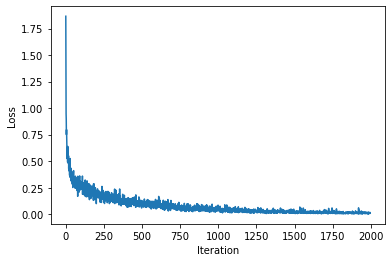

In [116]:
print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Loss')
plt.xlabel('Iteration')
plt.show()

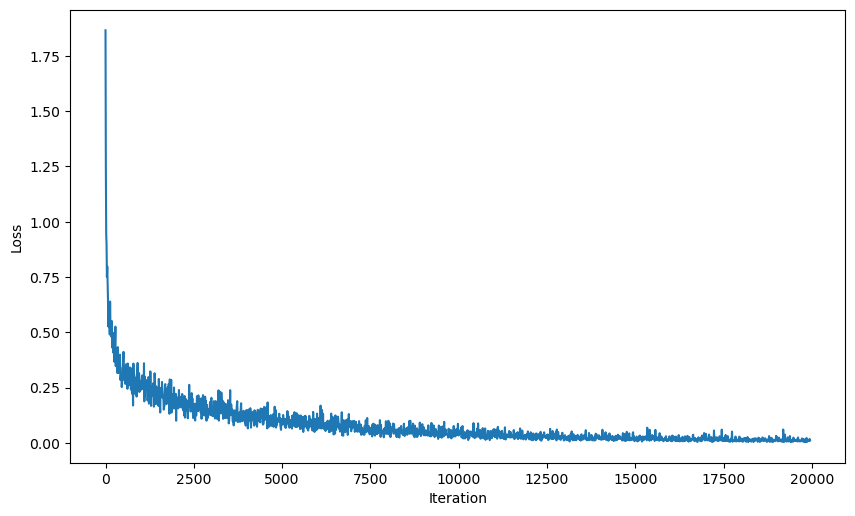

In [119]:
from matplotlib.pyplot import figure

figure(figsize=(10, 6), dpi=100)
y = range(0,19960,10)
plt.plot(y,iteration_loss)
plt.ylabel('Loss')
plt.xlabel('Iteration')
plt.show()

In [120]:
test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=batch_size)

In [123]:
from sklearn.metrics import accuracy_score

def evaluate_model(test_dl, model):
    model.eval() 
    total = 0
    correct = 0
    for images, labels in test_dl:
               
        images = images.view(-1, 28*28).to(device)

        outputs = model(images)

        _, predicted = torch.max(outputs, 1)

        total += labels.size(0)
        
        plt.imshow(images[0].reshape(28, 28, 1), cmap='gray')
        plt.title(f'Prediction: {predicted[0]} - Actual target: {labels[0]}')
        plt.show()

        if torch.cuda.is_available():
            correct += (predicted.cpu() == labels.cpu()).sum() 
        else:
            correct += (predicted == labels).sum()

    acc = 100 * correct.item() / total
    return acc

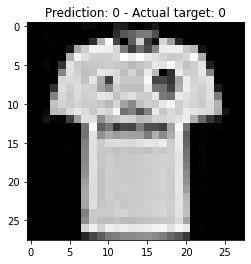

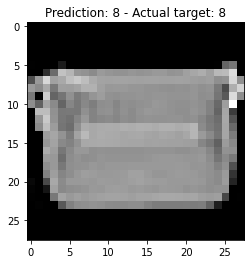

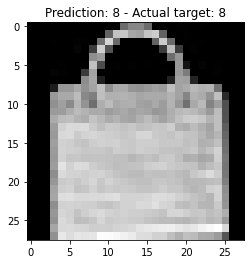

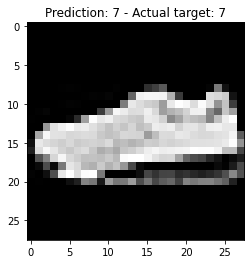

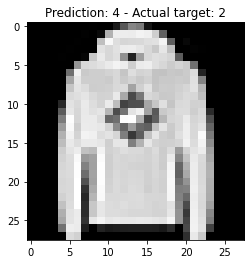

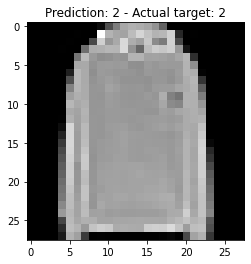

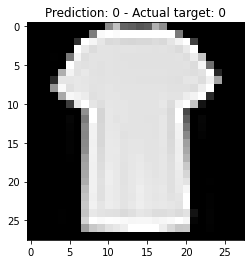

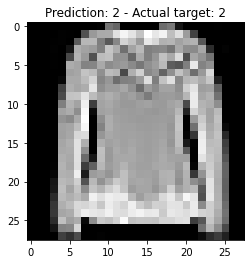

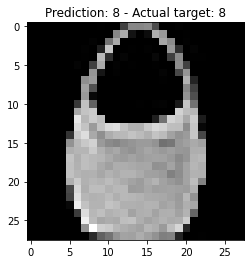

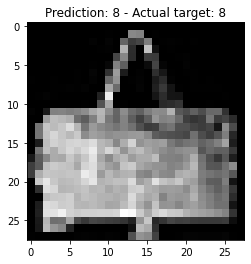

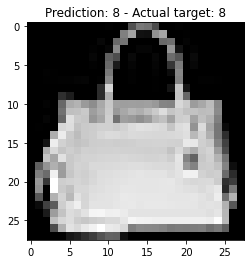

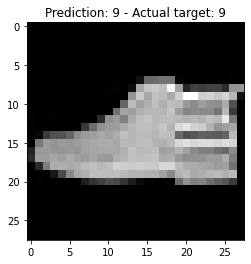

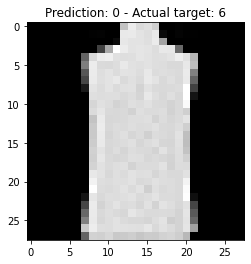

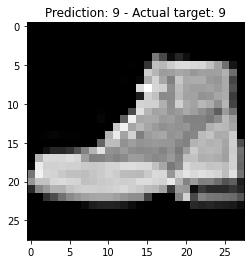

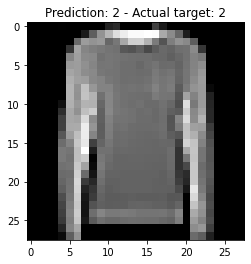

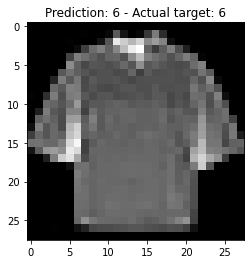

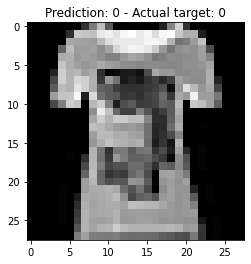

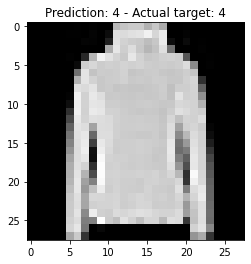

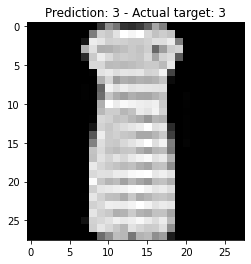

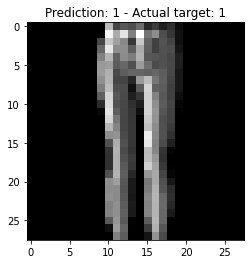

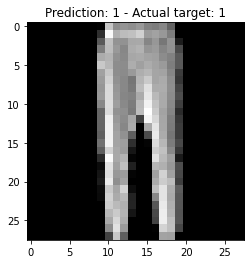

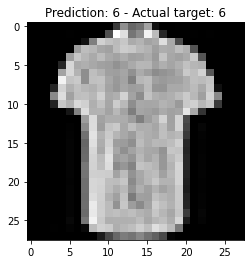

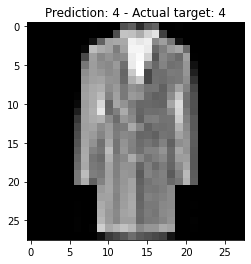

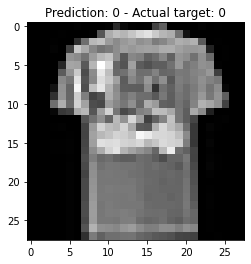

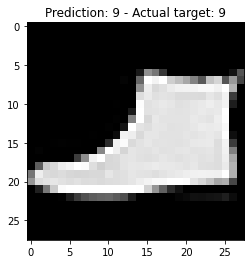

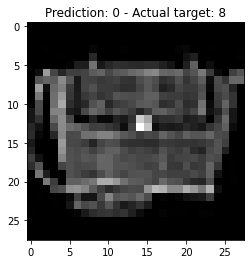

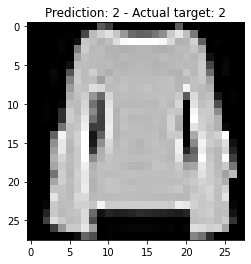

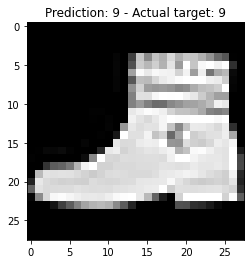

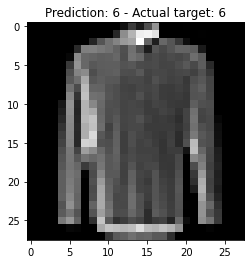

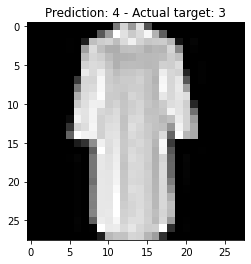

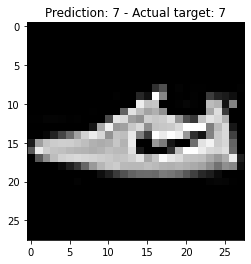

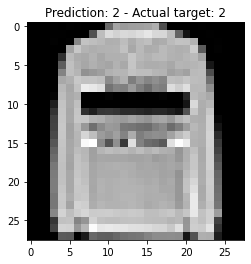

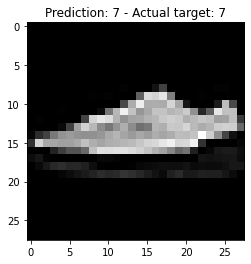

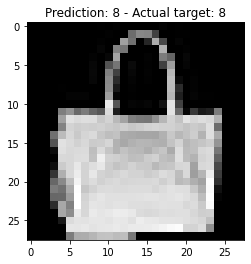

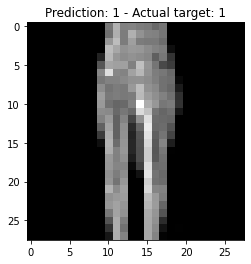

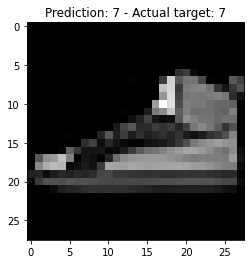

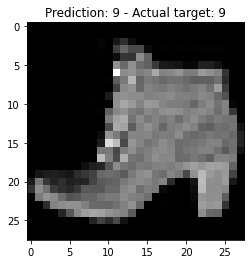

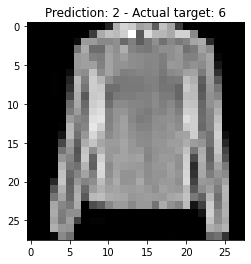

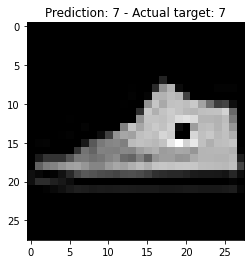

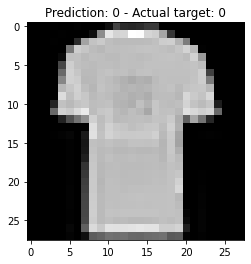

Accuracy: 88.480


In [124]:
acc = evaluate_model(test_loader, model)
print('Accuracy: %.3f' % acc)